## Some Basic EDA on Extracted Data from Resumes

In [52]:
import numpy as np
import pandas as pd
import re
import string # for text cleaning
import contractions # for expanding short form words
from tqdm import tqdm
tqdm.pandas(desc="Progress Bar")
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [63]:
# Load the cleaned data
resume_df = pd.read_csv('skills_education.csv')

In [64]:
resume_df.shape

(1015, 4)

### EDA on text data

Let's do some basic text cleaning & see some text statistics

In [59]:
def text_cleaning(text:str) -> str:
    if pd.isnull(text):
        return
    
    # lower-case everything
    text = text.lower().strip()
    
    # For removing puctuations
    translator = str.maketrans('', '', string.punctuation)
    
    # expand all the short-form words
    text = contractions.fix(text)
    
    # remove any special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URLs
    text = re.sub(r'\S+@\S+', '', text) # Remove emails
    text = re.sub(r'\b\d{1,3}[-./]?\d{1,3}[-./]?\d{1,4}\b', '', text) # Remove phone numbers
    text = text.translate(translator) # Remove puctuations
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove other non-alphanumeric characters
    
    return text.strip()

In [66]:
# Let's stitch together Skills & Education, similar to given in job description.

# Filling the null values in Skills & Education with Empty String before concatenating them
resume_df = resume_df.fillna(value='')

# Create the CV column by concatenating Skills and Education
resume_df['CV'] = resume_df['skills'] + ' ' + resume_df['education']
resume_df['CV'] = resume_df['CV'].progress_apply(text_cleaning)

# Calculate statistics for each category
category_stats = []

for category in resume_df['Category'].unique():
    category_wise_cv = resume_df[resume_df['Category'] == category]['CV']
    stats = category_wise_cv.str.split().str.len().describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95])
    category_stats.append({'Category': category, **stats.to_dict()})

stats_df = pd.DataFrame(category_stats)

# Display the resulting DataFrame
print(stats_df)

Progress Bar:   0%|          | 0/1015 [00:00<?, ?it/s]

Progress Bar: 100%|██████████| 1015/1015 [00:00<00:00, 7005.78it/s]

                 Category  count        mean        std   min     5%    50%  \
0    BUSINESS-DEVELOPMENT  120.0   72.883333  38.956382   0.0  24.00   67.5   
1              CONSULTANT  115.0   96.704348  57.150920  10.0  26.70   88.0   
2                DESIGNER  107.0   69.850467  41.906861   9.0  14.60   61.0   
3           DIGITAL-MEDIA   96.0   84.260417  50.345385  20.0  30.00   76.0   
4             ENGINEERING  118.0   88.830508  46.075431  15.0  30.70   82.5   
5                 FINANCE  118.0   80.220339  37.619357  21.0  35.00   70.0   
6                      HR  110.0   75.918182  38.883532  14.0  27.35   68.0   
7  INFORMATION-TECHNOLOGY  120.0  110.625000  48.165342  30.0  48.75  101.0   
8        PUBLIC-RELATIONS  111.0   91.801802  64.041154  17.0  33.00   76.0   

     80%    90%     95%    max  
0   94.2  112.5  138.25  279.0  
1  138.0  157.8  193.70  342.0  
2   99.6  122.0  141.00  213.0  
3  108.0  136.0  150.75  409.0  
4  122.6  152.5  174.75  262.0  
5  107.2  1

In [67]:
resume_df.head()

,skills,education,ID,Category,CV
0,"Cold, Excel","WFX, State\n \nManage, Staffing Coordinator\n ...",10228751,BUSINESS-DEVELOPMENT,cold excel wfx state manage staffing coordin...
1,Associate of Arts\n \n: \nGolf Management\n \n...,"LLC, Professional Golf Management\n \nCity\n \...",10235211,BUSINESS-DEVELOPMENT,associate of arts golf management cold ...
2,"The Over Achiever of the Year, Fortune 500, Ou...","State\n \nFinancial Operations\nExecutive, Sal...",10289113,BUSINESS-DEVELOPMENT,the over achiever of the year fortune outstan...
3,Ph.D.,"Birst, Business Management or Sales, Mailchimp...",10501991,BUSINESS-DEVELOPMENT,phd birst business management or sales mailchi...
4,"Fortune 500, Excel","Human Resources, Darton State College, Communi...",10541358,BUSINESS-DEVELOPMENT,fortune excel human resources darton state co...


### Analyzing Mean Word length(and Percentile wise) in CVs by their Category

In [68]:
category_stats = []
for category in resume_df['Category'].unique():
    category_wise_cv = resume_df[resume_df['Category'] == category]['CV']
    stats = category_wise_cv.str.split().str.len().describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95])
    category_stats.append({'Category': category, **stats.to_dict()})
stats_df = pd.DataFrame(category_stats)

# Display the resulting DataFrame
stats_df

,Category,count,mean,std,min,5%,50%,80%,90%,95%,max
0,BUSINESS-DEVELOPMENT,120.0,72.883333,38.956382,0.0,24.00,67.5,94.2,112.5,138.25,279.0
1,CONSULTANT,115.0,96.704348,57.150920,10.0,26.70,88.0,138.0,157.8,193.70,342.0
2,DESIGNER,107.0,69.850467,41.906861,9.0,14.60,61.0,99.6,122.0,141.00,213.0
3,DIGITAL-MEDIA,96.0,84.260417,50.345385,20.0,30.00,76.0,108.0,136.0,150.75,409.0
4,ENGINEERING,118.0,88.830508,46.075431,15.0,30.70,82.5,122.6,152.5,174.75,262.0
5,FINANCE,118.0,80.220339,37.619357,21.0,35.00,70.0,107.2,138.8,165.30,185.0
6,HR,110.0,75.918182,38.883532,14.0,27.35,68.0,99.0,121.9,156.75,229.0
7,INFORMATION-TECHNOLOGY,120.0,110.625000,48.165342,30.0,48.75,101.0,150.2,173.1,204.50,279.0
8,PUBLIC-RELATIONS,111.0,91.801802,64.041154,17.0,33.00,76.0,126.0,150.0,171.50,541.0


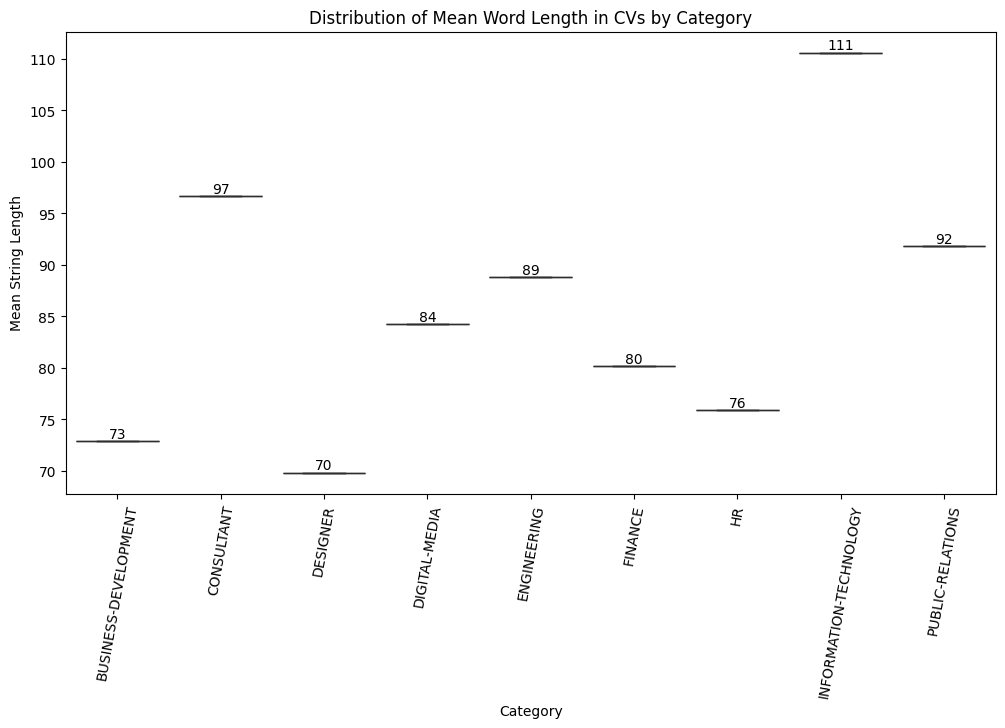

In [69]:
# Create a box plot to visualize the distribution of string lengths for each category
plt.figure(figsize=(12, 6))
sns.boxplot(data=stats_df, x='Category', y='mean', palette='viridis')

# Annotate the bars with actual values
for index, row in stats_df.iterrows():
    plt.text(index, row['mean'], f'{round(row["mean"])}', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Mean Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Mean String Length')
plt.show();

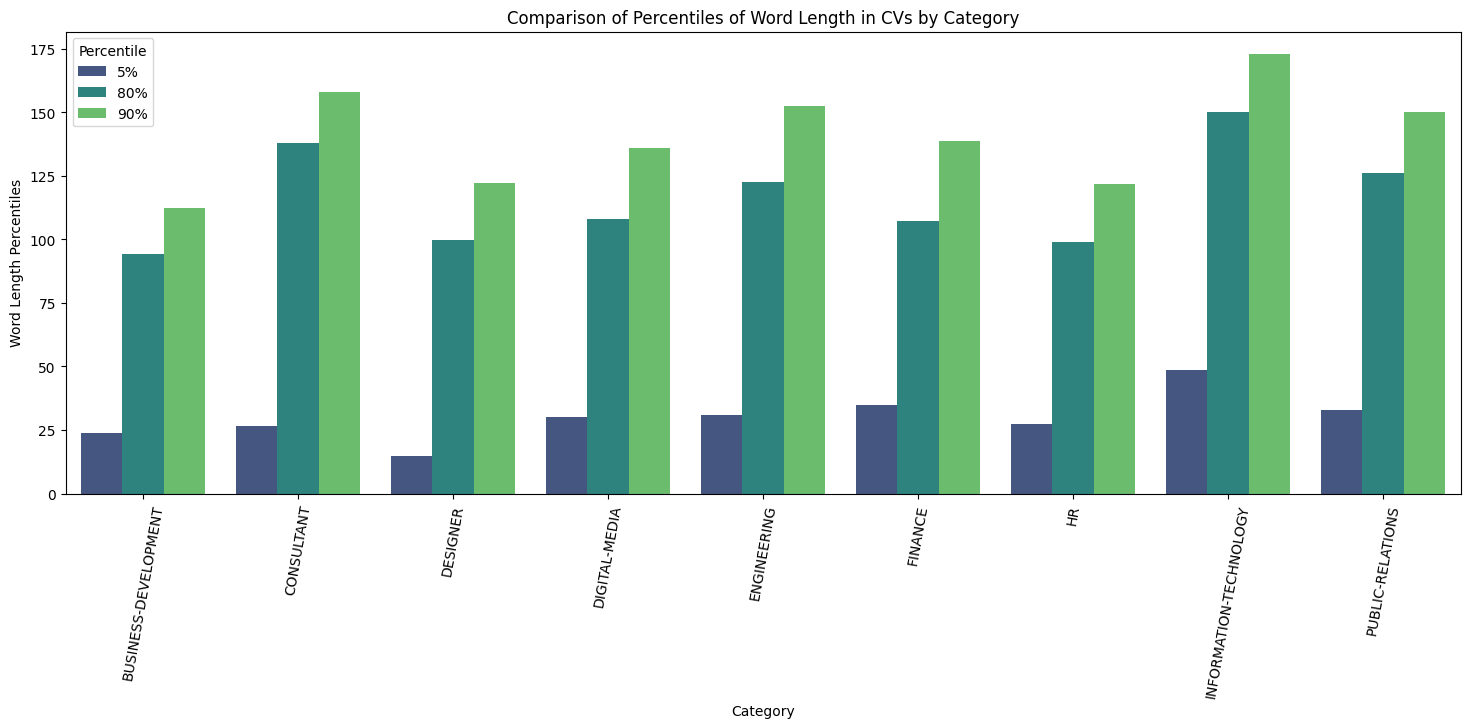

In [70]:
# Reshape the DataFrame to long format for easier plotting
stats_df_long = pd.melt(stats_df, id_vars=['Category'], value_vars=['5%', '80%', '90%'])

# Create a bar plot to compare percentiles of word length for each category
plt.figure(figsize=(18, 6))
sns.barplot(data=stats_df_long, x='Category', y='value', hue='variable', palette='viridis')
plt.title('Comparison of Percentiles of Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Word Length Percentiles')
plt.legend(title='Percentile')
plt.show();

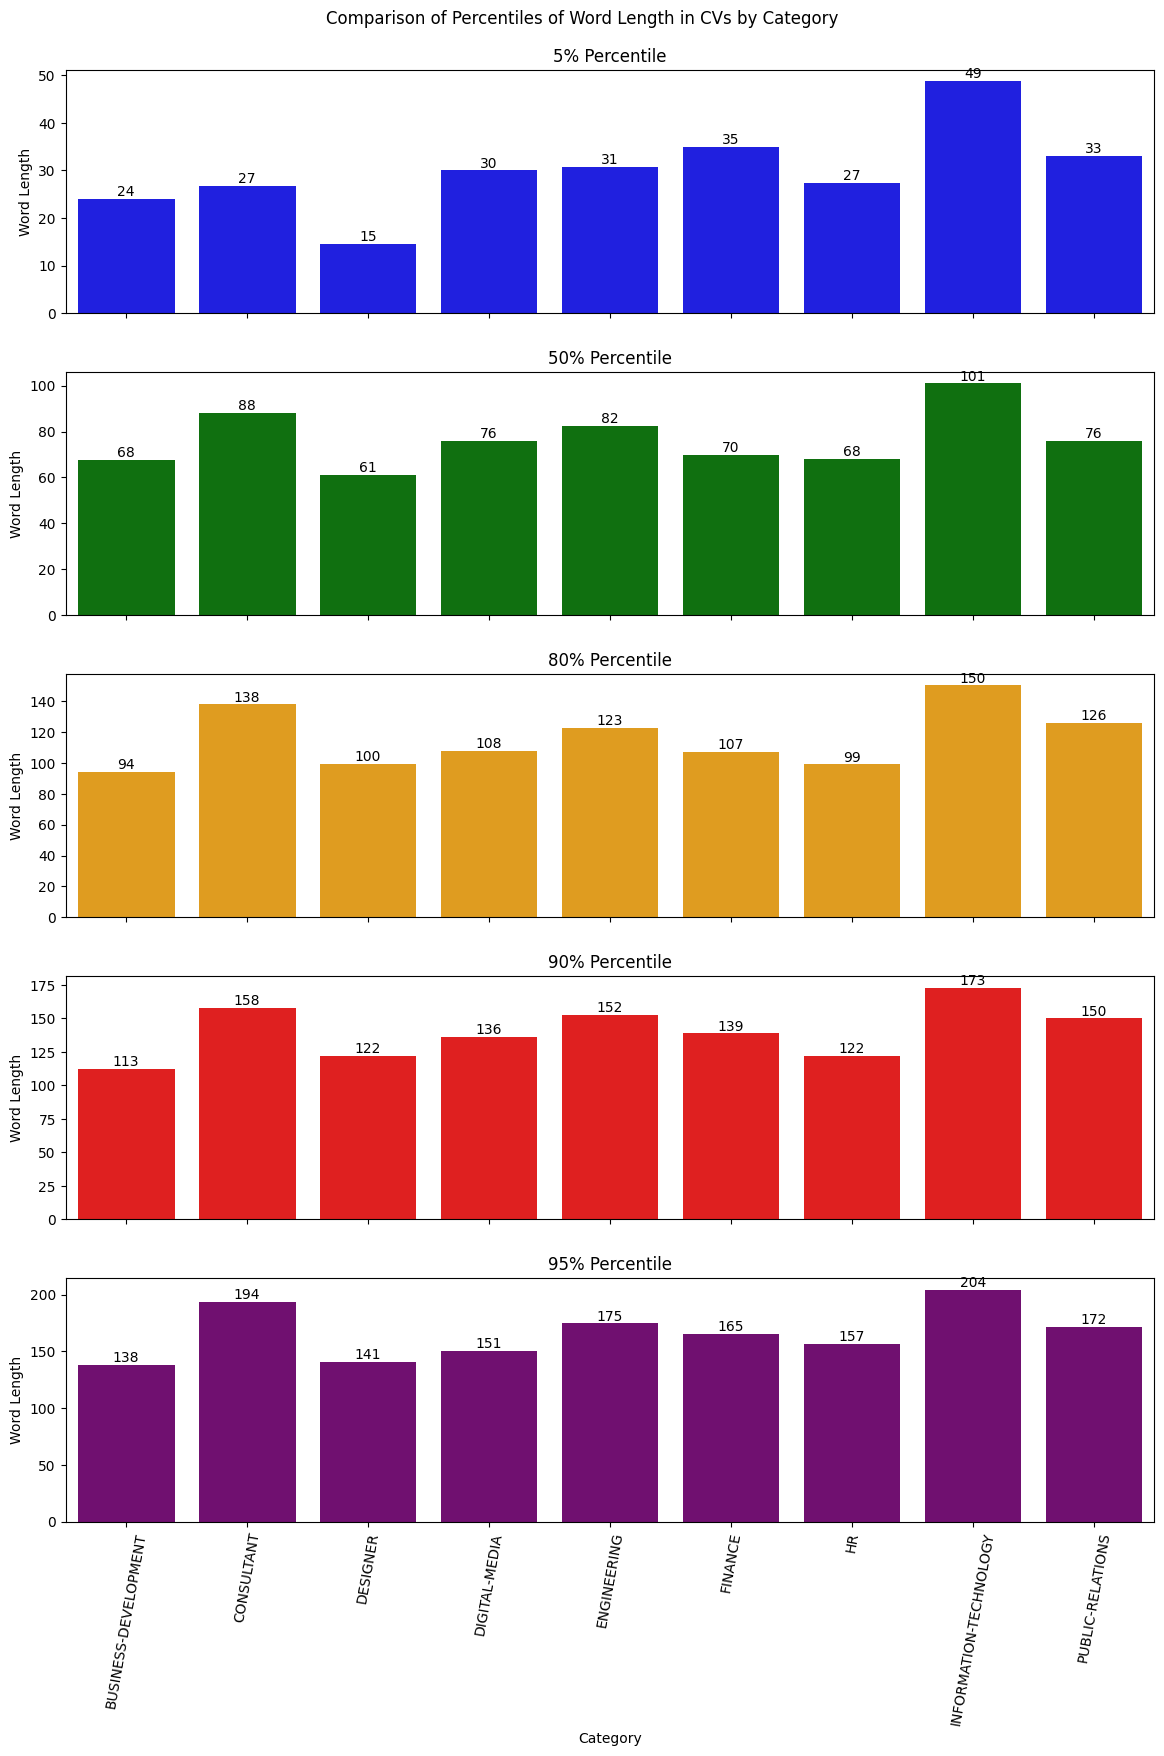

In [71]:
# Create a 5x1 subplot
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)
percentiles = ['5%', '50%', '80%', '90%', '95%']
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, percentile in enumerate(percentiles):
    # Create a bar plot for each percentile
    sns.barplot(data=stats_df, x='Category', y=percentile, color=colors[i], ax=axes[i])
    
    # Annotate the bars with actual values
    for index, row in stats_df.iterrows():
        value = row[percentile]
        axes[i].text(index, value, f'{round(value)}', ha='center', va='bottom', fontsize=10)
    axes[i].set_title(f'{percentile} Percentile')
    axes[i].set_ylabel('Word Length')

# Set the common x-axis label and rotate x-axis ticks
plt.xlabel('Category')
plt.xticks(rotation=80)
plt.suptitle('Comparison of Percentiles of Word Length in CVs by Category')

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Show the plots
plt.show();

## Same EDA on JD Data

In [74]:
from datasets import load_dataset
jd_data = load_dataset('jacob-hugging-face/job-descriptions', split="train")
jd_df = pd.DataFrame(jd_data)
jd_df.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [75]:
jd_df['job_description'] = jd_df['job_description'].progress_apply(text_cleaning)

Progress Bar: 100%|██████████| 853/853 [00:00<00:00, 1462.41it/s]


In [76]:
# A lot of position_title are present
jd_df.position_title.unique()
len(jd_df.position_title.unique())

725

In [77]:
# A lot of companies
jd_df.company_name.unique()
len(jd_df.company_name.unique())

853

### Comapring the word lengths in JDs and CVs

Though keep in mind, that number of JDs(=853) are less compared to CVs(=2469). So, results will be biased, this just for visulaization purposes.

In [78]:
# Analyzing Mean Word length(and Percentile wise) in Job Descriptions
jd_df['job_description'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count     853.000000
mean      482.649472
std       304.695458
min         3.000000
5%         82.200000
50%       441.000000
80%       702.000000
90%       849.800000
95%      1001.000000
max      3581.000000
Name: job_description, dtype: float64

In [79]:
# Analyzing Mean Word length(and Percentile wise) in extracted resumes
resume_df['CV'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count    1015.000000
mean       85.905419
std        49.058663
min         0.000000
5%         28.000000
50%        76.000000
80%       118.000000
90%       149.000000
95%       170.000000
max       541.000000
Name: CV, dtype: float64

In [81]:
# Calculate word lengths and describe statistics for job descriptions
jd_word_lengths = jd_df['job_description'].str.split().str.len()
jd_stats = jd_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Calculate word lengths and describe statistics for CVs
resume_word_lengths = resume_df['CV'].str.split().str.len()
resume_stats = resume_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Create separate DataFrames for job descriptions and CVs
jd_df_stats = pd.DataFrame({
    'Type': 'Job Descriptions',
    'Statistic': jd_stats.index,
    'Value': jd_stats.values
})

resume_stats_df = pd.DataFrame({
    'Type': 'CVs',
    'Statistic': resume_stats.index,
    'Value': resume_stats.values
})

# Concatenate the DataFrames for plotting
comparison_df = pd.concat([jd_df_stats, resume_stats_df], ignore_index=True)
comparison_df

,Type,Statistic,Value
0,Job Descriptions,count,853.000000
1,Job Descriptions,mean,482.649472
2,Job Descriptions,5%,82.200000
3,Job Descriptions,50%,441.000000
4,Job Descriptions,80%,702.000000
5,Job Descriptions,90%,849.800000
6,Job Descriptions,95%,1001.000000
7,CVs,count,1015.000000
8,CVs,mean,85.905419
9,CVs,5%,28.000000


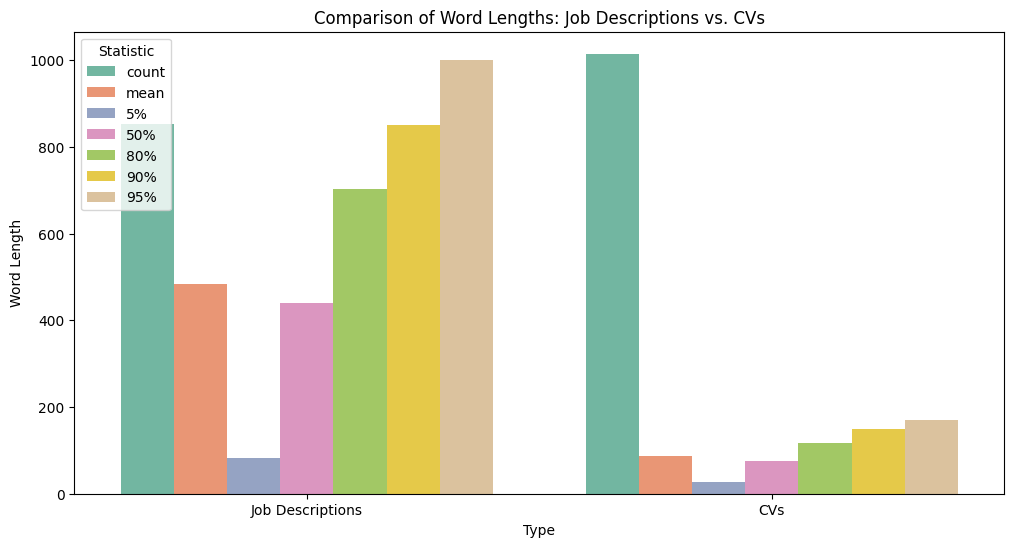

In [82]:
# Create a box plot to compare word lengths
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Type', y='Value', hue='Statistic', palette='Set2')
plt.title('Comparison of Word Lengths: Job Descriptions vs. CVs')
plt.xlabel('Type')
plt.ylabel('Word Length')
plt.legend(title='Statistic', loc='upper left')
plt.xticks(rotation=0)
plt.show();